In [1]:
import pandas as pd
import numpy as np

In [2]:
# load dfc
dfc = pd.read_csv('/media/ruairi/UBUNTU/db/CLUSTERS_DONE.csv')


# load perfection
perf = pd.read_csv('/media/ruairi/UBUNTU/db/perfection.csv')
perf = perf[['neuron_id', 'response', 'treatment', 'virus', 'experiment_name']]


# load dfc


/home/ruairi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# merge
df = pd.merge(how='left', left=dfc, right=perf, on='neuron_id').drop_duplicates()
df = df[['neuron_id', 'response', 
         'treatment', 'virus', 'hc_cluster',
         'experiment_name']]
df['response'] = df['response'].fillna('excluded')

In [4]:
df['response'].value_counts(dropna=False)

excluded     297
no effect    129
decrease     102
increase      90
Name: response, dtype: int64

### Citalopram

In [5]:
exp = 'CIT_WAY'

dfs = df[(df['experiment_name'] == exp) & 
         (df['response']!= 'excluded')]

df_out2 = dfs.pivot_table(index=['hc_cluster', 'treatment'], columns='response', aggfunc='count')['neuron_id']
totals = df_out2.sum(1).values
df_out2 = np.round(df_out2.div(df_out2.sum(1), 0), 3)
df_out2['Total Neurons'] = totals

In [6]:
df_out2

response                          decrease  increase  no effect  Total Neurons
hc_cluster             treatment                                              
Clocklike Slow Regular CIT           0.311     0.444      0.244           45.0
                       SAL           0.042     0.042      0.917           24.0
Fast Varied            CIT           0.318     0.364      0.318           22.0
                       SAL           0.333     0.222      0.444            9.0
Slow Irregular         CIT           0.636     0.227      0.136           22.0
                       SAL           0.077     0.462      0.462           13.0
Very Fast Regular      CIT           0.300     0.300      0.400           10.0
                       SAL             NaN     0.500      0.500            2.0

### SERT DREADD

In [7]:
exp = 'SERT_DREADD'

dfs = df[(df['experiment_name'] == exp) & 
         (df['response']!= 'excluded')]

df_out2 = dfs.pivot_table(index=['hc_cluster', 'virus'], columns='response', aggfunc='count')['neuron_id']
totals = df_out2.sum(1).values
df_out2 = np.round(df_out2.div(df_out2.sum(1), 0), 3)
df_out2['Total Neurons'] = totals

In [8]:
df_out2

response                        decrease  increase  no effect  Total Neurons
hc_cluster             virus                                                
Clocklike Slow Regular hM3Dq       0.277     0.255      0.468           47.0
                       mCherry     0.543     0.257      0.200           35.0
Fast Varied            hM3Dq       0.500     0.250      0.250            8.0
                       mCherry       NaN     0.333      0.667            3.0
Slow Irregular         hM3Dq       0.192     0.192      0.615           26.0
                       mCherry     0.400     0.400      0.200            5.0
Very Fast Regular      hM3Dq       0.667       NaN      0.333            3.0
                       mCherry       NaN       NaN      1.000            1.0

### GAT DREADD

In [9]:
exp = 'GAT_DREADD'

dfs = df[(df['experiment_name'] == exp) & 
         (df['response']!= 'excluded')]

df_out2 = dfs.pivot_table(index=['hc_cluster', 'virus'], columns='response', aggfunc='count')['neuron_id']
totals = df_out2.sum(1).values
df_out2 = np.round(df_out2.div(df_out2.sum(1), 0), 3)
df_out2['Total Neurons'] = totals

In [10]:
df_out2

response                        decrease  increase  no effect  Total Neurons
hc_cluster             virus                                                
Clocklike Slow Regular hM3Dq       0.316     0.368      0.316           19.0
                       mCherry       NaN       NaN      1.000            1.0
Fast Varied            mCherry       NaN       NaN      1.000            4.0
Slow Irregular         hM3Dq       0.800       NaN      0.200            5.0
                       mCherry     0.235     0.353      0.412           17.0

### BARS

In [11]:
cit = df[(df['experiment_name'] == 'CIT_WAY') & 
         (df['response']!= 'excluded')]

In [12]:
import matplotlib.pyplot as plt

In [13]:
df1 = cit[cit['response']=='decrease']
dfp = df1.groupby(['hc_cluster', 'treatment']).size().reset_index().pivot(columns='hc_cluster',
                                                                    index='treatment', 
                                                                    values=0).fillna(0)
dfp = dfp.apply(lambda x: np.round(x/np.sum(x), 3), axis=1)

In [14]:
df1.groupby('treatment')['neuron_id'].apply(len)

treatment
CIT    38
SAL     5
Name: neuron_id, dtype: int64

In [15]:
pal2 = ['#c44e52','#55a868',  '#4c72b0', '#dd8452']

In [20]:
cit.groupby('response').apply(lambda x: len(x)/len(cit) * 100)

response
decrease     29.251701
increase     31.292517
no effect    39.455782
dtype: float64

In [39]:
cit.groupby(['response', 'treatment']).apply(lambda x: len(x)/len(
    cit[cit['treatment']==x['treatment']].values[0]) * 100)

KeyError: 'treatment'

Text(0.5,0,'Treatment')

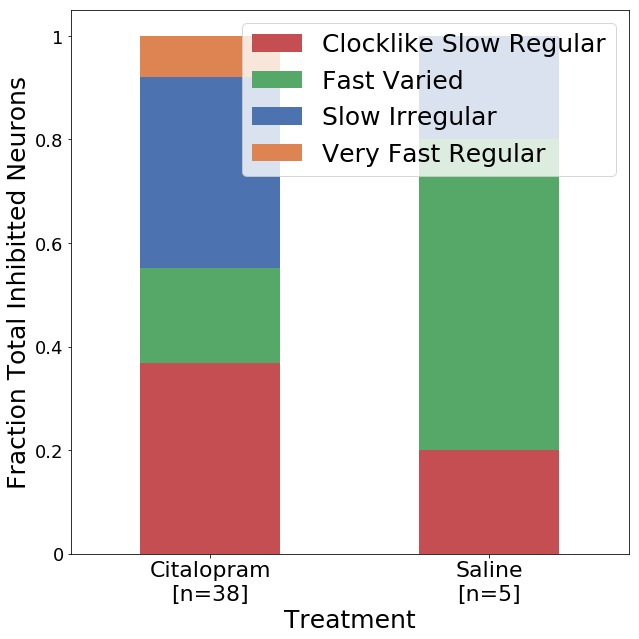

In [22]:
save_dir = '/media/ruairi/UBUNTU/figures/frac_bars'
f, a = plt.subplots(figsize=(10, 10))

dfp.reset_index().plot(x='treatment', 
                       kind='bar', 
                       stacked=True, 
                       color=pal2, ax=a)


a.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontdict={'fontsize':18})
a.set_xticklabels(['Citalopram\n[n=38]', 'Saline\n[n=5]'], 
                  fontdict={'fontsize':22},
                 rotation=0)
a.legend(loc=1, prop={'size':25})
a.set_ylabel('Fraction Total Inhibitted Neurons', fontdict={'fontsize': 25})

a.set_xlabel('Treatment', fontdict={'fontsize': 25})
# plt.savefig(os.path.join(save_dir, 'cit.png'), dpi=300)

Text(0.5,0,'Treatment')

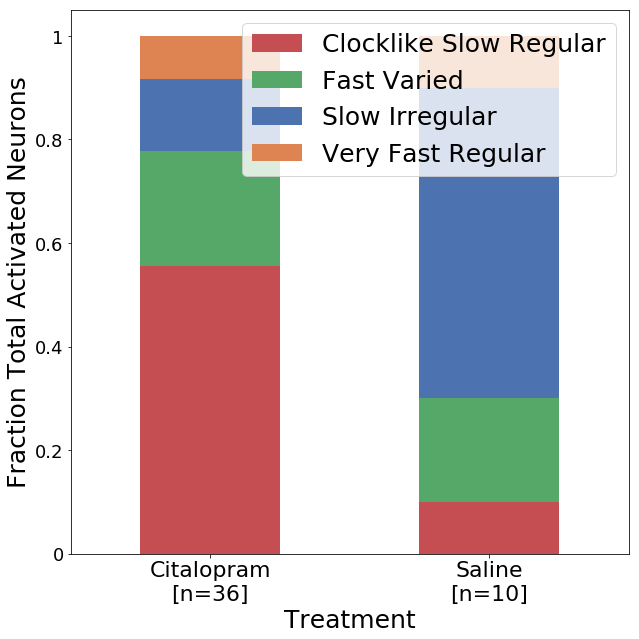

In [23]:
df1 = cit[cit['response']=='increase']
dfp = df1.groupby(['hc_cluster', 'treatment']).size().reset_index().pivot(columns='hc_cluster',
                                                                    index='treatment', 
                                                                    values=0).fillna(0)
dfp = dfp.apply(lambda x: np.round(x/np.sum(x), 3), axis=1)

f, a = plt.subplots(figsize=(10, 10))

dfp.reset_index().plot(x='treatment', 
                       kind='bar', 
                       stacked=True, 
                       color=pal2, ax=a)


a.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontdict={'fontsize':18})
a.set_xticklabels(['Citalopram\n[n=36]', 'Saline\n[n=10]'], 
                  fontdict={'fontsize':22},
                 rotation=0)
a.legend(loc=1, prop={'size':25})
a.set_ylabel('Fraction Total Activated Neurons', fontdict={'fontsize': 25})

a.set_xlabel('Treatment', fontdict={'fontsize': 25})
# plt.savefig(os.path.join(save_dir, 'cit_increase.png'), dpi=300)

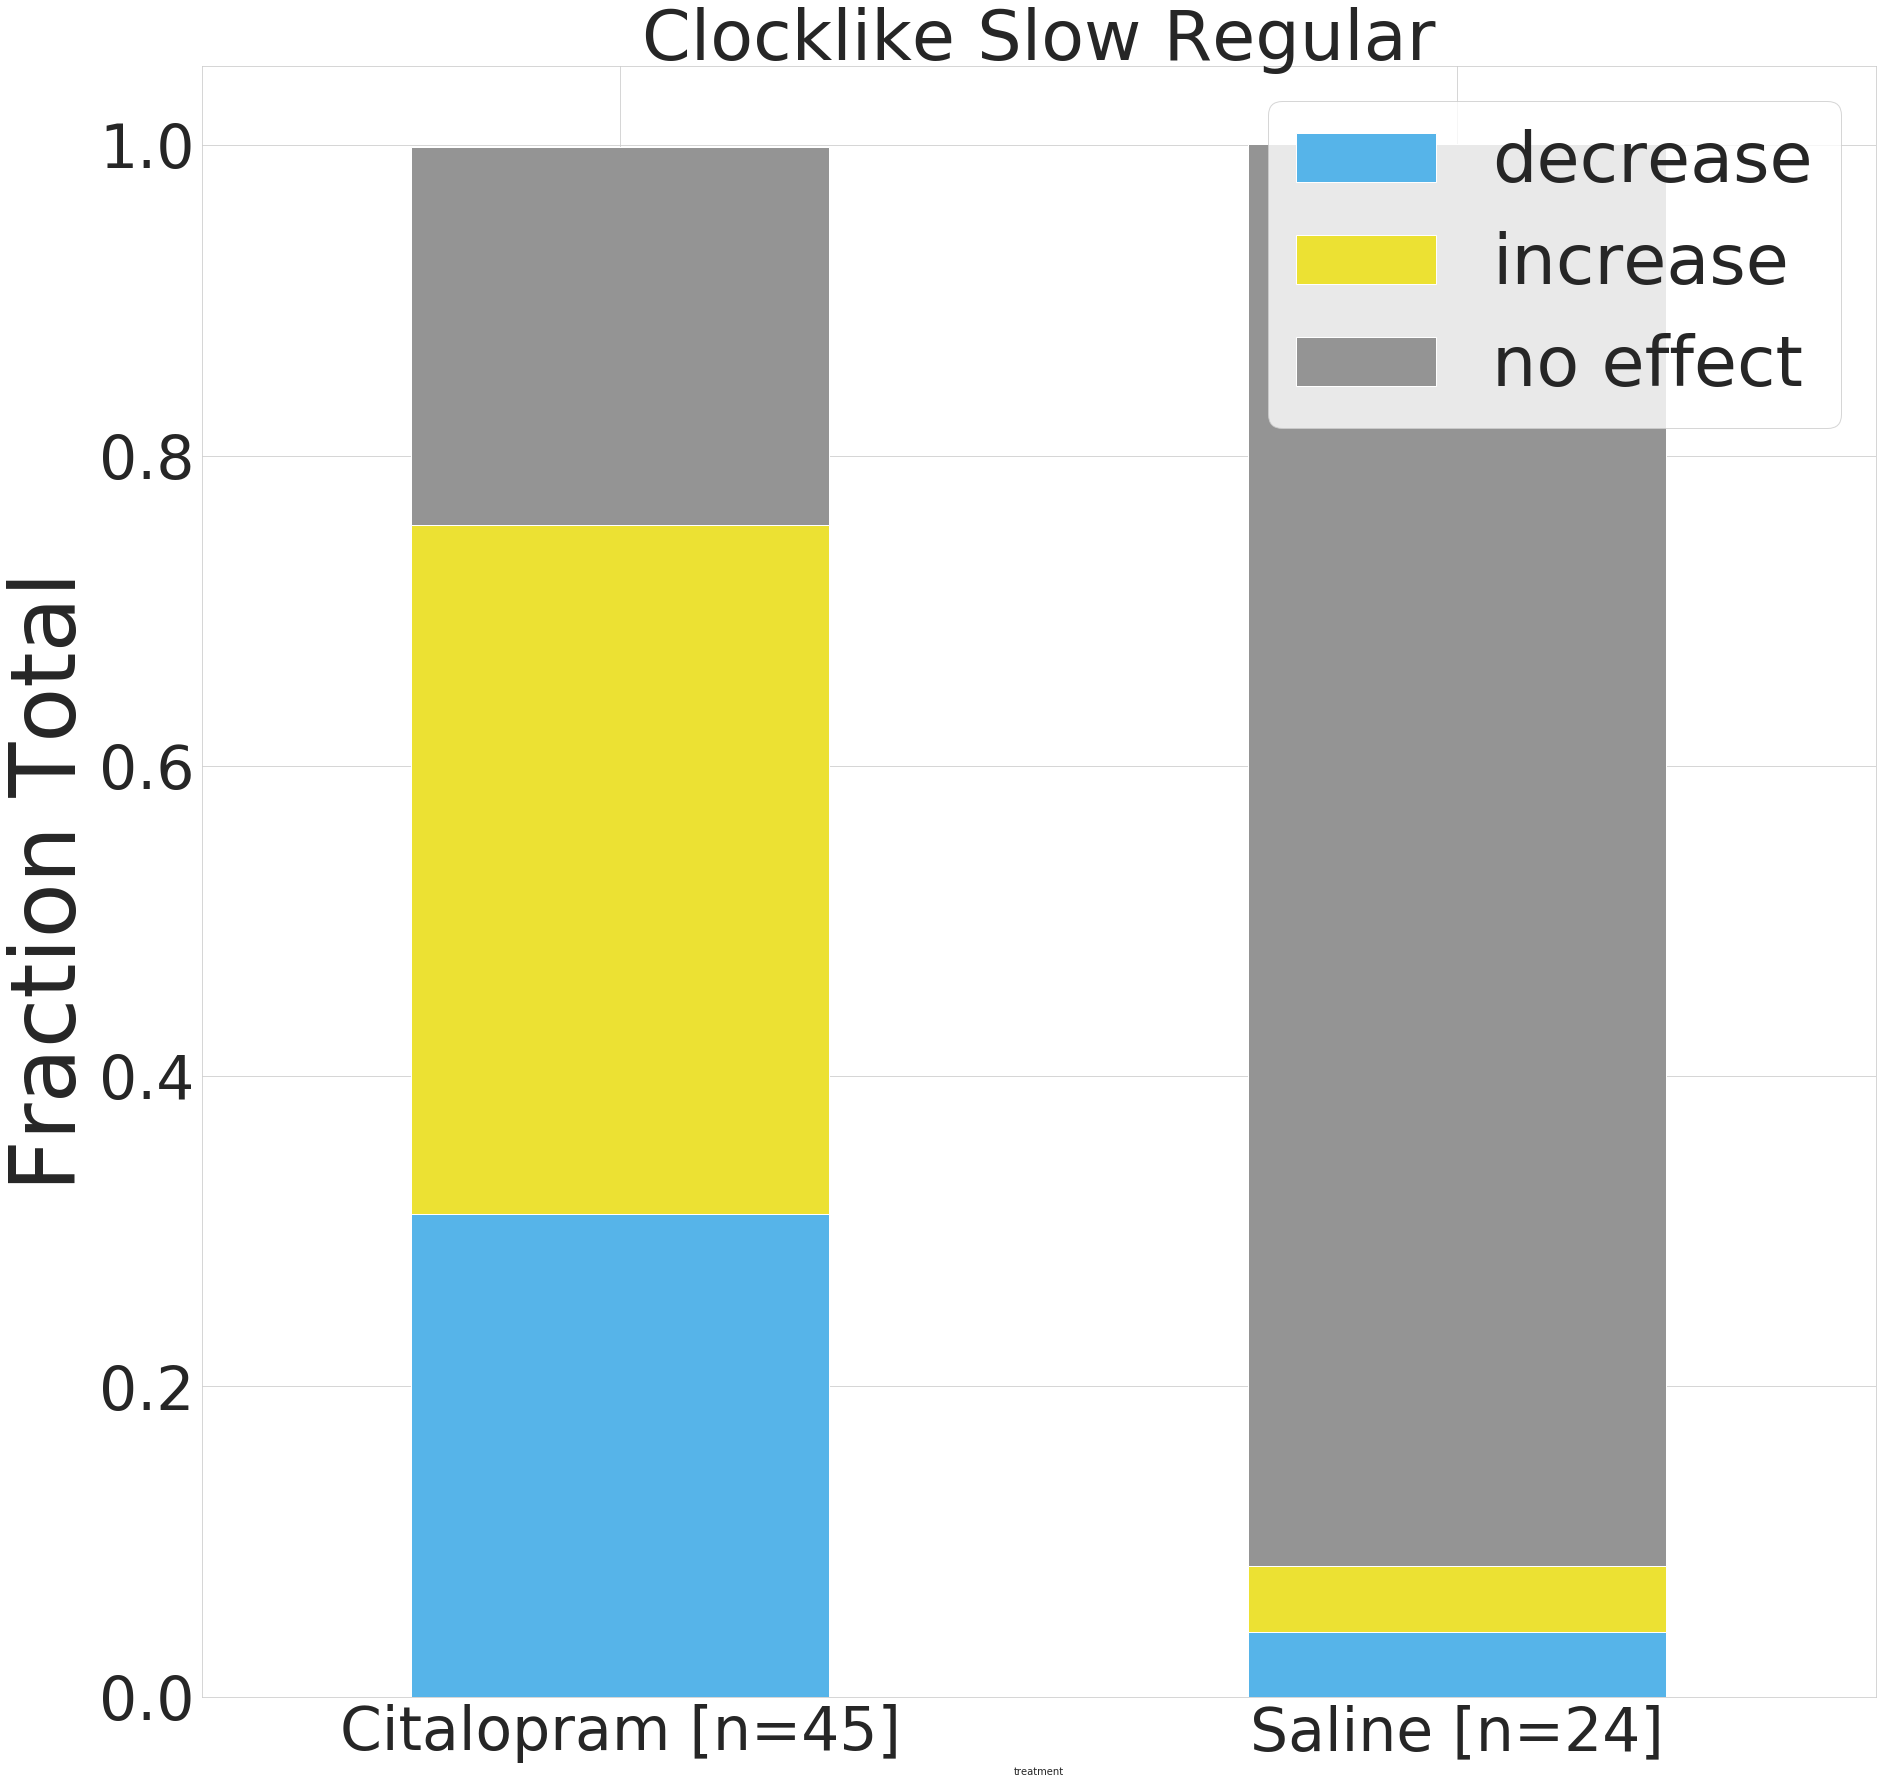

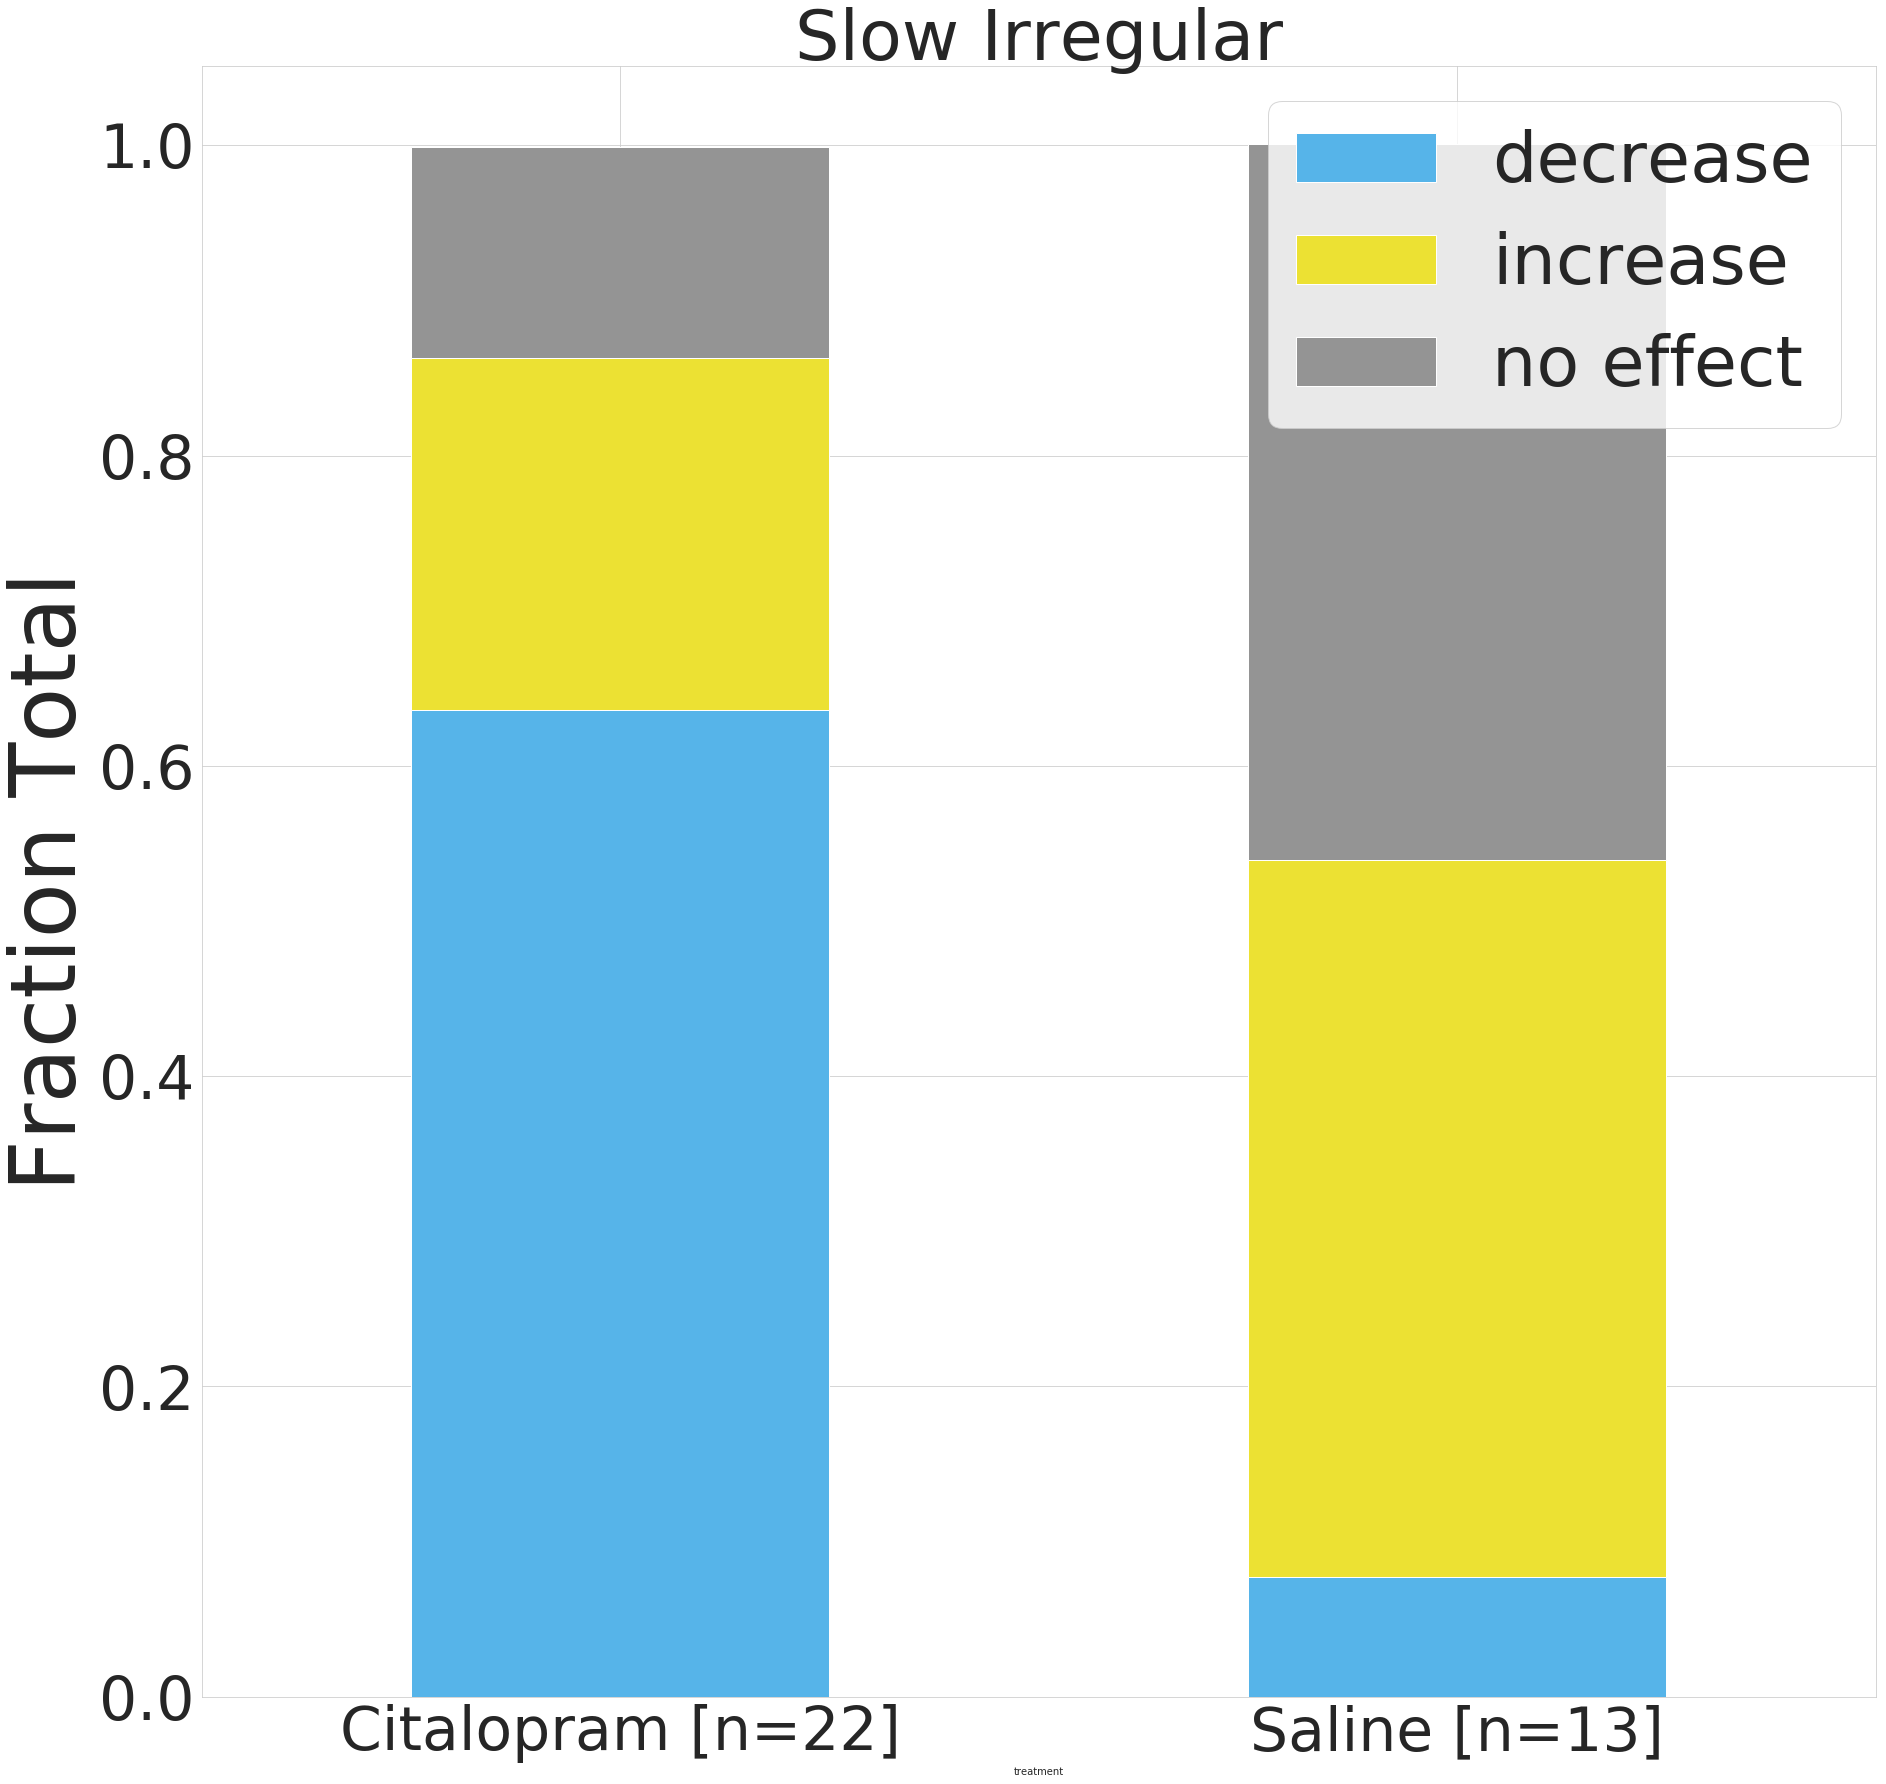

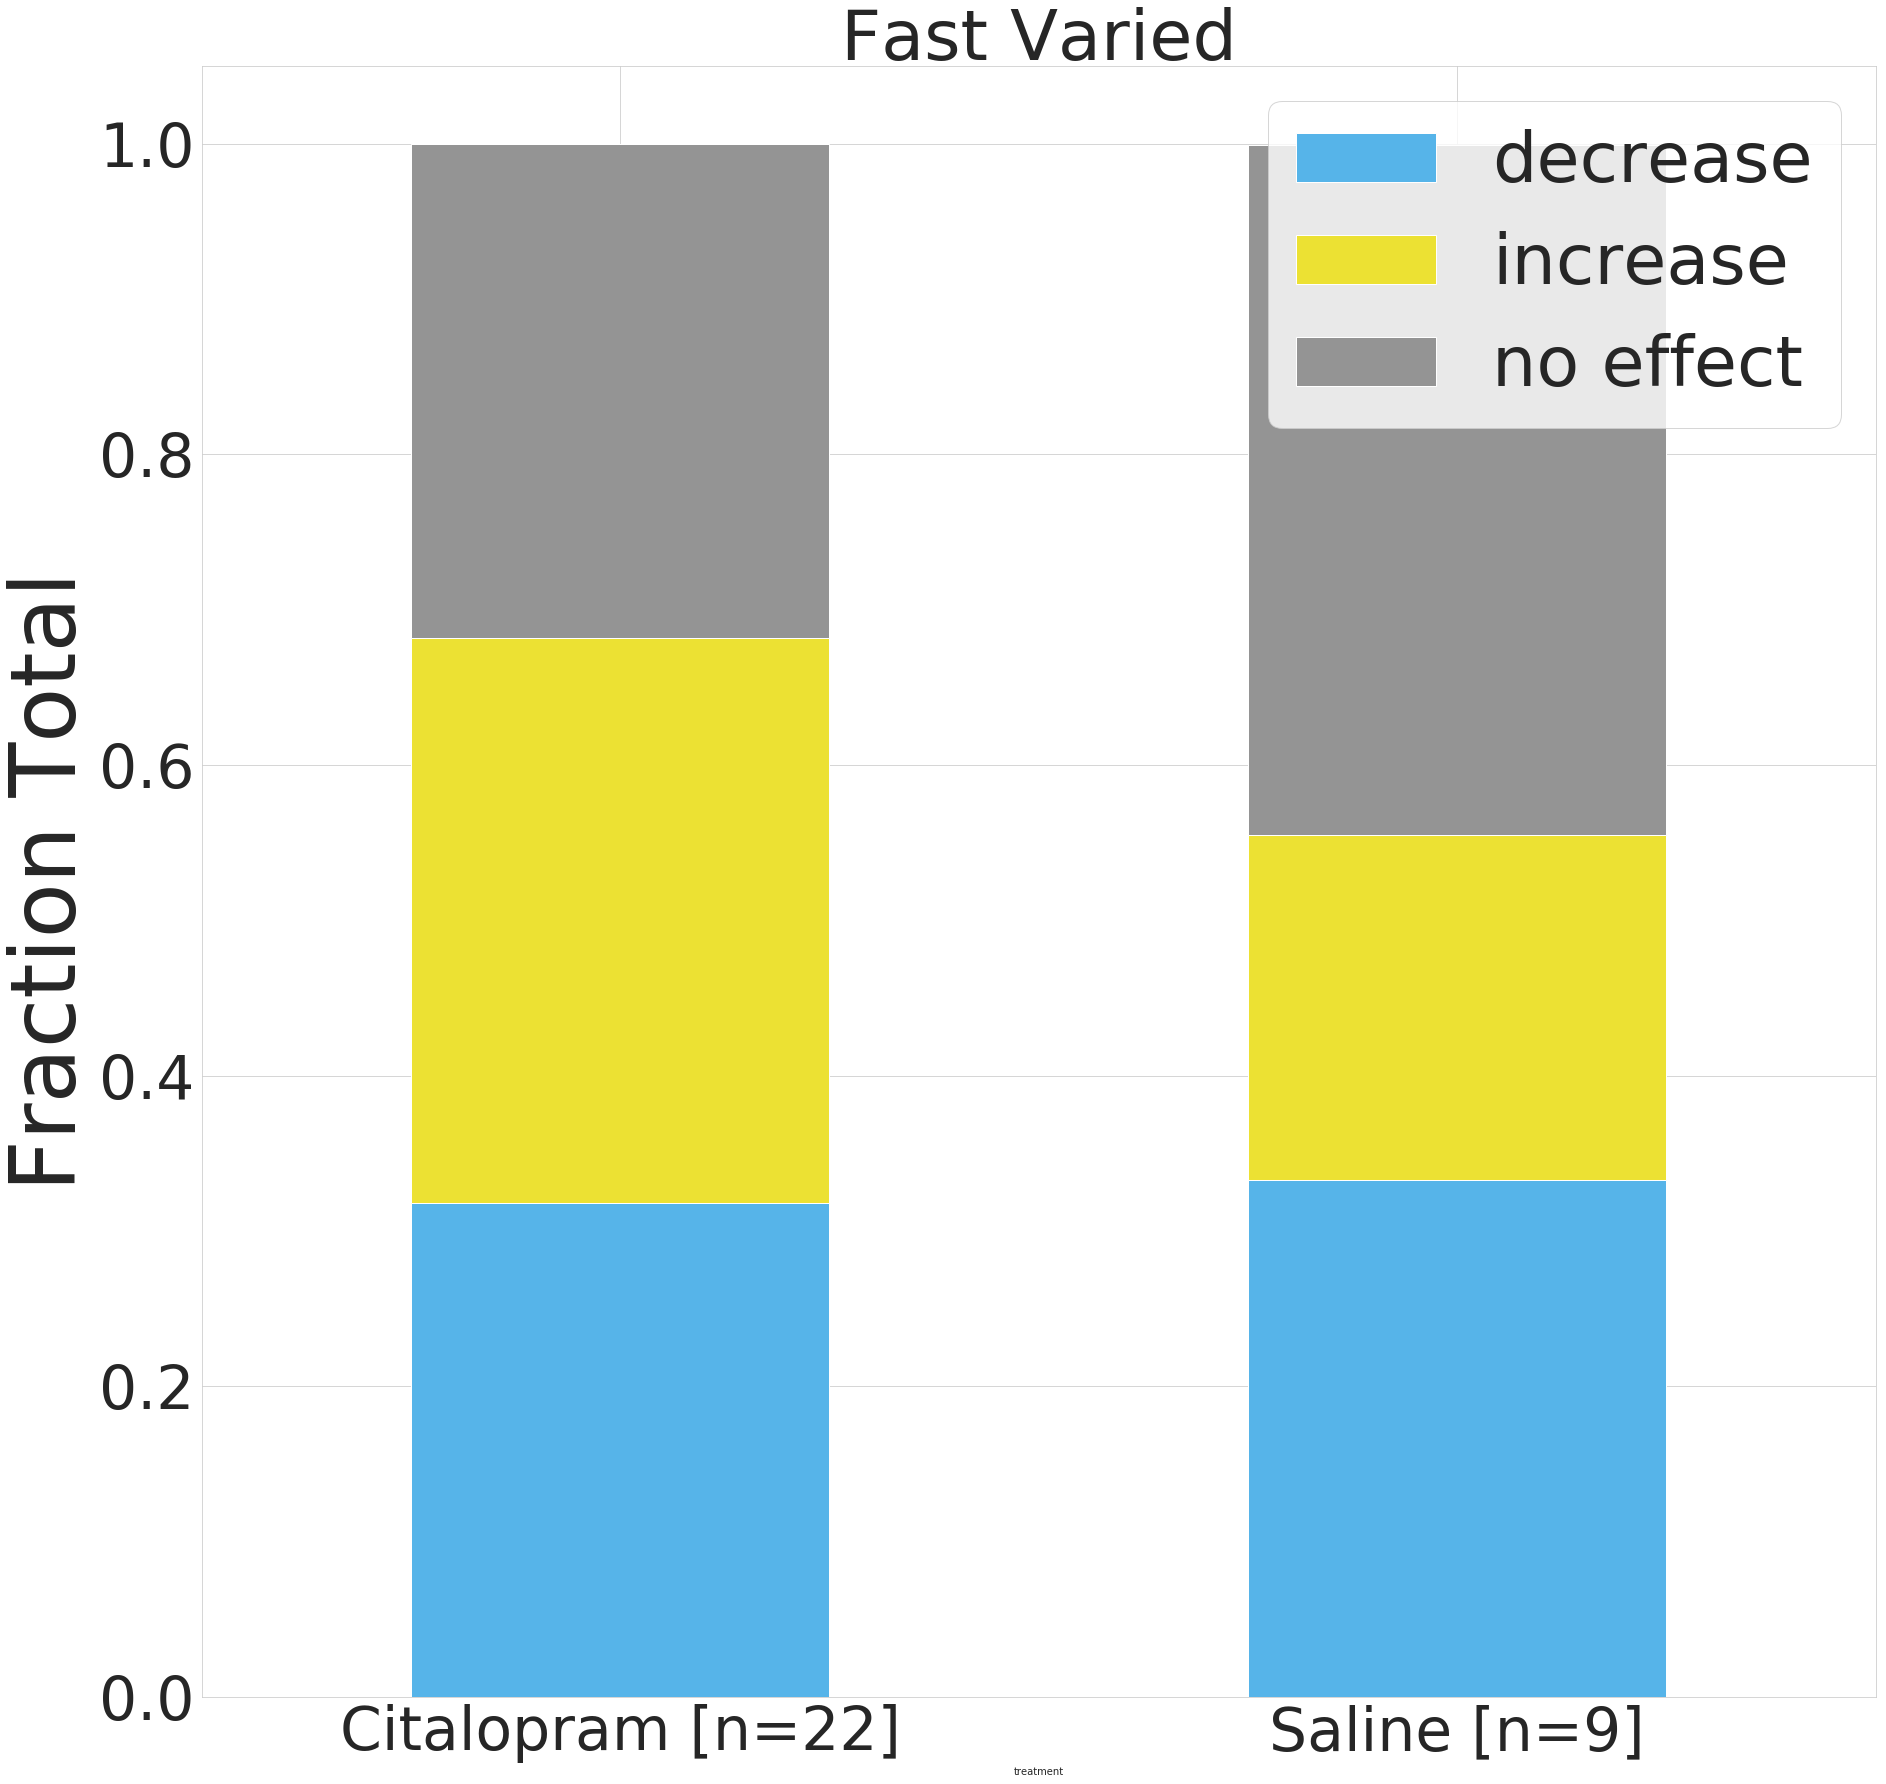

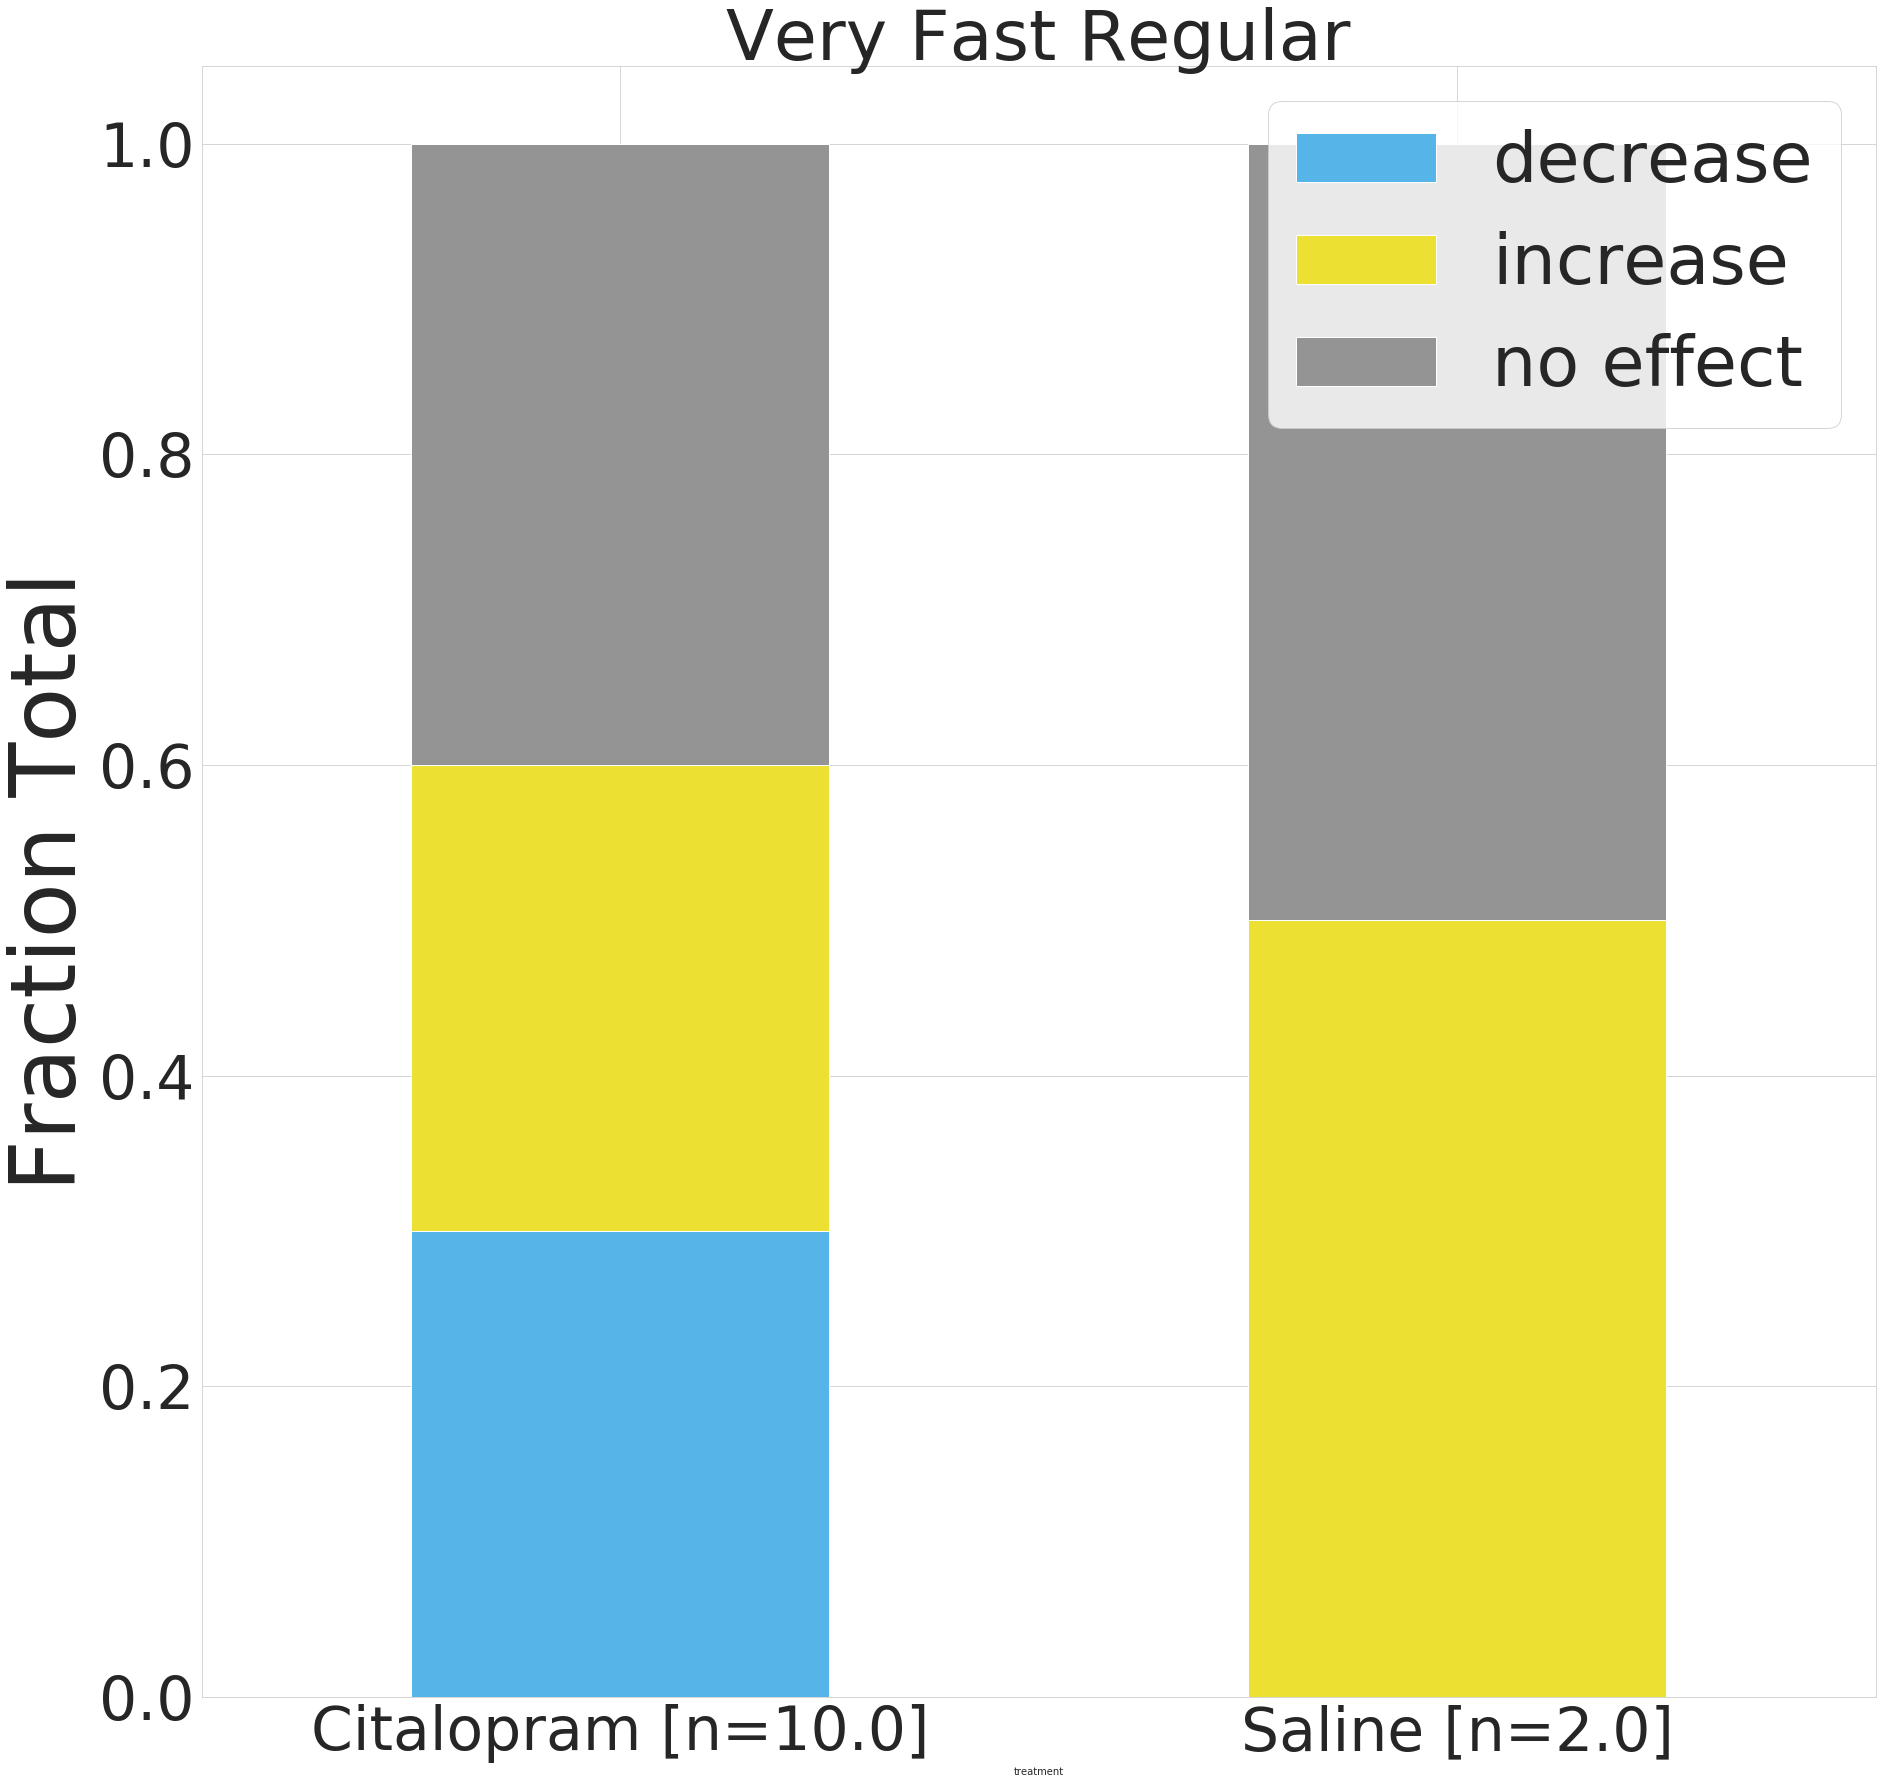

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set_style('whitegrid')
save_dir = '/media/ruairi/UBUNTU/figures/bars'
exp= 'CIT_WAY'

for cat in cit['hc_cluster'].unique():
    f, a = plt.subplots(figsize=(30, 30))

    cmap = sns.color_palette('colorblind', n_colors=10)[::-1]

    df1 = cit[cit['hc_cluster']==cat]
    dfp = df1.groupby(['response', 'treatment']).size().reset_index().pivot(columns='response',
                                                                    index='treatment', 
                                                                    values=0).fillna(0)
    sums = dfp.apply(np.sum, axis=1).values
    dfp = dfp.apply(lambda x: np.round(x/np.sum(x), 3), axis=1)
    dfp.reset_index().plot(x='treatment', kind='bar', stacked=True, 
                               color=cmap, ax=a)
    a.set_title(cat, fontdict={'fontsize': 70})
    
    a.set_xticklabels([f'Citalopram [n={sums[0]}]', f'Saline [n={sums[1]}]'])
    a.legend(loc=0, prop={'size':70})
    plt.xticks(rotation=0)
    for tick in a.yaxis.get_major_ticks():
        tick.label.set_fontsize(60)
    for tick in a.xaxis.get_major_ticks():
        tick.label.set_fontsize(60)
    plt.ylabel('Fraction Total', fontdict={'fontsize': 90})
    plt.savefig(os.path.join(save_dir, f'{exp}_{cat}.png'), dpi=300)

In [25]:
import matplotlib.pyplot as plt


df5 = pd.merge(left=dfc[dfc['neuron_id'].isin(cit['neuron_id'].values)], 
               right=cit[['response', 'neuron_id', 'treatment']],
         how='left', on='neuron_id')

In [26]:
pal = {'Clocklike Slow Regular':'#c44e52',
'Slow Irregular':'#4c72b0',
'Fast Varied':'#55a868',
'Very Fast Regular': '#dd8452' }

In [27]:
df5[df5['response']!='no effect'].groupby('treatment')['neuron_id'].apply(len)

treatment
CIT    74
SAL    15
Name: neuron_id, dtype: int64

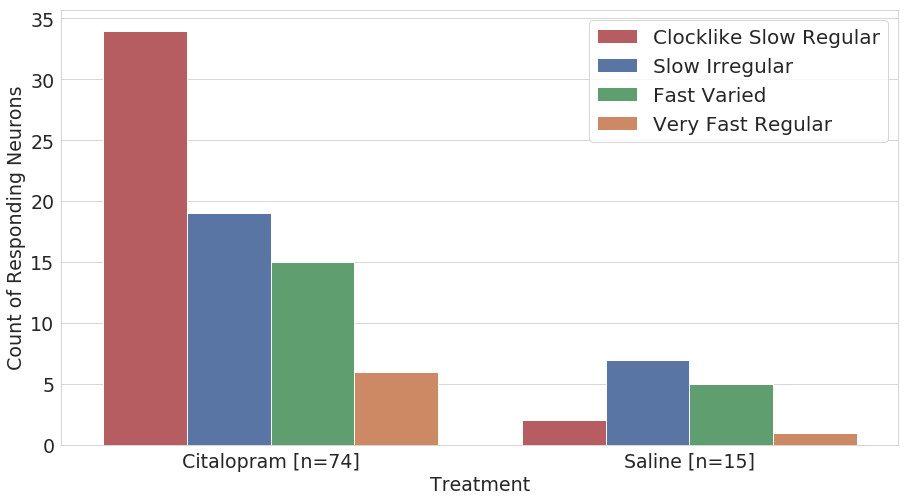

In [30]:
import seaborn as sns
sns.set_style('whitegrid')
import os

f, a = plt.subplots(figsize=(15, 8))


sns.countplot(data=df5[df5['response']!='no effect'], x='treatment', hue='hc_cluster', 
              palette=pal, ax=a)

a.set_ylabel('Count of Responding Neurons', fontdict={'fontsize':19})
a.set_xlabel('Treatment', fontdict={'fontsize':19})
a.set_xticklabels(['Citalopram [n=74]', 'Saline [n=15]'], fontdict={'fontsize':19})
a.set_yticklabels(labels=[0, 5, 10, 15, 20, 25, 30, 35], fontdict={'fontsize':19})
a.legend(loc=0, prop={'size': 20})


save_dir = '/media/ruairi/UBUNTU/figures/new_bars'
# plt.savefig(os.path.join(save_dir, 'cit.png'), dpi=300)

In [28]:
sert = df[(df['experiment_name'] == 'SERT_DREADD') & 
         (df['response']!= 'excluded')]

In [37]:
sert[sert['response']=='increase'].groupby('virus').apply(len)

virus
hM3Dq      19
mCherry    12
dtype: int64

In [40]:
s_d = sert[sert['virus']=='hM3Dq']
s_c = sert[sert['virus']=='mCherry']

In [43]:
s_d.groupby('response').apply(lambda x: len(x)/ len(s_d))

response
decrease     0.285714
increase     0.226190
no effect    0.488095
dtype: float64

In [44]:
s_c.groupby('response').apply(lambda x: len(x)/ len(s_c))

response
decrease     0.477273
increase     0.272727
no effect    0.250000
dtype: float64

In [34]:
# f, a = plt.subplots(figsize=(30, 30))

df1 = sert[sert['response']=='increase']
dfp = df1.groupby(['hc_cluster', 'virus']).size().reset_index().pivot(columns='hc_cluster',
                                                                    index='virus', 
                                                                    values=0).fillna(0)
dfp = dfp.apply(lambda x: np.round(x/np.sum(x), 3), axis=1)


In [35]:
dfp

hc_cluster,Clocklike Slow Regular,Fast Varied,Slow Irregular
virus,,,
hM3Dq,0.632,0.105,0.263
mCherry,0.750,0.083,0.167


In [ ]:
pal2 = ['#c44e52','#55a868',  '#4c72b0', '#dd8452']

In [ ]:
df1.groupby('virus').apply(len)

In [ ]:
f, a = plt.subplots(figsize=(10, 10))

dfp.reset_index().plot(x='virus', kind='bar', stacked=True, 
                       color=pal2, ax=a)
a.set_xticklabels(['hM3Dq\n[n=24]', 'mCherry\n[n=21]'], 
                  fontdict={'fontsize':20}, rotation=0)
a.set_yticklabels([0,0.2, 0.4, 0.6, 0.8, 1], fontdict={'fontsize':20})

a.legend(loc=1, prop={'size': 20})
a.set_ylabel('Fraction Total Inhibited Neurons', 
             fontdict={'fontsize': 25})

a.set_xlabel('Virus', fontdict={'fontsize': 25})
plt.savefig(os.path.join(save_dir, 'sert_decrease.png'), dpi=300)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

exp = 'sert_dreadd'

for cat in sert['hc_cluster'].unique():
    f, a = plt.subplots(figsize=(30, 30))

    cmap = sns.color_palette('colorblind', n_colors=10)[::-1]

    df1 = sert[sert['hc_cluster']==cat]
    dfp = df1.groupby(['response', 'virus']).size().reset_index().pivot(columns='response',
                                                                    index='virus', 
                                                                    values=0).fillna(0)
    sums = dfp.apply(np.sum, axis=1).values
    dfp = dfp.apply(lambda x: np.round(x/np.sum(x), 3), axis=1)
    dfp.reset_index().plot(x='virus', kind='bar', stacked=True, 
                               color=cmap, ax=a)
    a.set_title(cat, fontdict={'fontsize': 70})
    a.set_xticklabels([f'hM3Dq [n={sums[0]}]', f'mCherry [n={sums[1]}]'])
    plt.xticks(rotation=0)
    a.legend(loc=0, prop={'size': 70})
    for tick in a.yaxis.get_major_ticks():
        tick.label.set_fontsize(60)
    for tick in a.xaxis.get_major_ticks():
        tick.label.set_fontsize(60)
    plt.ylabel('Fraction Total', fontdict={'fontsize': 90})
    plt.savefig(os.path.join(save_dir, f'{exp}_{cat}.png'), dpi=300)

In [ ]:
df6[df6['response']!='no effect'].groupby('virus')['neuron_id'].apply(len)

In [ ]:
df6[df6['response']=='increase'].groupby(['virus'])['neuron_id'].apply(len)

In [ ]:
df6 = pd.merge(left=dfc[dfc['neuron_id'].isin(sert['neuron_id'].values)], 
               right=sert[['response', 'neuron_id', 'virus']],
         how='left', on='neuron_id')


f, a = plt.subplots(figsize=(15, 8))

sns.countplot(data=df6[df6['response']=='increase'], 
              x='virus', 
              hue='hc_cluster', palette=pal, 
              hue_order=['Clocklike Slow Regular', 'Slow Irregular', 'Fast Varied'],
             ax=a)


a.set_ylabel('Count of Activated Neurons', fontdict={'fontsize':19})
a.set_xlabel('Virus', fontdict={'fontsize':19})
a.set_xticklabels(['hM3Dq [n=19]', 'mCherry [n=12]'], fontdict={'fontsize':19})
a.set_yticklabels(labels=[0, 2, 4, 6, 8, 10, 12], fontdict={'fontsize':19})
a.legend(loc=0, prop={'size': 20})


save_dir = '/media/ruairi/UBUNTU/figures/new_bars'
plt.savefig(os.path.join(save_dir, 'sert.png'), dpi=300)

In [32]:
gat = df[(df['experiment_name'] == 'GAT_DREADD') & 
         (df['response']!= 'excluded')]

In [33]:
df1.groupby('virus').apply(len)

""
virus


In [50]:
df1 = gat[gat['response']=='increase']
dfp = df1.groupby(['hc_cluster', 'virus']).size().reset_index().pivot(columns='hc_cluster',
                                                                    index='virus', 
                                                                    values=0).fillna(0)
dfp = dfp.apply(lambda x: np.round(x/np.sum(x), 3), axis=1)

In [52]:
df1 = gat[gat['response']=='increase']
dfp = df1.groupby(['hc_cluster', 'virus']).size().reset_index().pivot(columns='hc_cluster',
                                                                    index='virus', 
                                                                    values=0).fillna(0)
dfp = dfp.apply(lambda x: np.round(x/np.sum(x), 3), axis=1)
dfp

hc_cluster,Clocklike Slow Regular,Slow Irregular
virus,,
hM3Dq,1.0,0.0
mCherry,0.0,1.0


In [45]:
gat.groupby('virus').apply(len)

virus
hM3Dq      24
mCherry    22
dtype: int64

In [46]:
g_d = gat[gat['virus']=='hM3Dq']
g_c = gat[gat['virus']=='mCherry']


In [55]:
g_d.groupby('response').apply(lambda x: len(x)/ len(g_d) * 100)

response
decrease     41.666667
increase     29.166667
no effect    29.166667
dtype: float64

In [56]:
g_c.groupby('response').apply(lambda x: len(x)/ len(g_c) * 100)

response
decrease     18.181818
increase     27.272727
no effect    54.545455
dtype: float64

In [ ]:
f, a = plt.subplots(figsize=(10, 10))

dfp.reset_index().plot(x='virus', kind='bar', stacked=True, 
                       color=pal2[::2], ax=a)
a.set_xticklabels(['hM3Dq\n[n=10]', 'mCherry\n[n=4]'], 
                  fontdict={'fontsize':20}, rotation=0)
a.set_yticklabels([0,0.2, 0.4, 0.6, 0.8, 1], fontdict={'fontsize':20})

a.legend(loc=0, prop={'size': 20})
a.set_ylabel('Fraction Total Inhibited Neurons', 
             fontdict={'fontsize': 25})

a.set_xlabel('Virus', fontdict={'fontsize': 25})
plt.savefig(os.path.join(save_dir, 'gat_decrease.png'), dpi=300)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

exp = 'gat_dreadd'

for cat in sert['hc_cluster'].unique():
    f, a = plt.subplots(figsize=(30, 30))

    cmap = sns.color_palette('colorblind', n_colors=10)[::-1]

    df1 = gat[gat['hc_cluster']==cat]
    dfp = df1.groupby(['response', 'virus']).size().reset_index().pivot(columns='response',
                                                                    index='virus', 
                                                                    values=0).fillna(0)
    sums = dfp.apply(np.sum, axis=1).values
    dfp = dfp.apply(lambda x: np.round(x/np.sum(x), 3), axis=1)
    dfp.reset_index().plot(x='virus', kind='bar', stacked=True, 
                               color=cmap, ax=a)
    a.set_title(cat, fontdict={'fontsize': 70})
    a.set_xticklabels([f'hM3Dq [n={sums[0]}]', f'mCherry [n={sums[1]}]'])
    plt.xticks(rotation=0)
    a.legend(loc=0, prop={'size': 70})
    for tick in a.yaxis.get_major_ticks():
        tick.label.set_fontsize(60)
    for tick in a.xaxis.get_major_ticks():
        tick.label.set_fontsize(60)
    plt.ylabel('Fraction Total', fontdict={'fontsize': 90})
    plt.savefig(os.path.join(save_dir, f'{exp}_{cat}.png'), dpi=300)

In [ ]:
df6 = pd.merge(left=dfc[dfc['neuron_id'].isin(gat['neuron_id'].values)], 
               right=gat[['response', 'neuron_id', 'virus']],
         how='left', on='neuron_id')

f, a = plt.subplots(figsize=(15, 8))

sns.countplot(data=df6[df6['response']!='no effect'][::-1], 
              x='virus', 
              hue='hc_cluster', palette=pal, 
              ax=a)


a.set_ylabel('Count of Responding Neurons', fontdict={'fontsize':19})
a.set_xlabel('Virus', fontdict={'fontsize':19})
a.set_xticklabels(['hM3Dq [n=17]', 'mCherry [n=10]'], fontdict={'fontsize':19})
a.set_yticklabels(labels=[0, 2, 4, 6, 8, 10, 12], fontdict={'fontsize':19})
a.legend(loc=0, prop={'size': 20})


save_dir = '/media/ruairi/UBUNTU/figures/new_bars'
plt.savefig(os.path.join(save_dir, 'gat.png'), dpi=300)

In [ ]:
df6[df6['response']!='no effect'].groupby('virus')['neuron_id'].apply(len)